In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
admissions = pd.read_csv('ADMISSIONS.csv')

In [4]:
df = admissions
def diff_time(stime, etime):
    sdate = datetime.strptime(stime, "%Y-%m-%d %H:%M:%S")
    edate = datetime.strptime(etime, "%Y-%m-%d %H:%M:%S")
    difference = edate - sdate
    day_diff = difference.total_seconds() / (24 * 60 * 60)
    return day_diff
    
df['TOT_TIME'] = df.apply(lambda row: diff_time(row['ADMITTIME'], row['DISCHTIME']), axis=1)

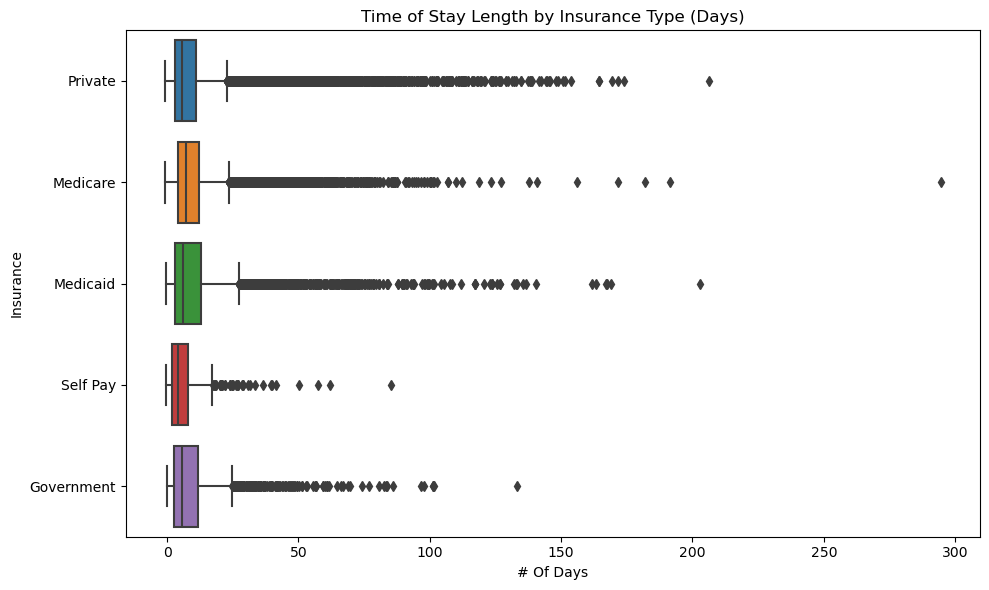

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TOT_TIME', y='INSURANCE', data=df)

# Add a title and labels
plt.title('Time of Stay Length by Insurance Type (Days)')
plt.xlabel('# Of Days')
plt.ylabel('Insurance')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\tom\AppData\Local\Temp\ipykernel_41736\1352808905.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ADMIT_YEAR'] = df.apply(lambda row: toYear(row['ADMITTIME']), axis=1)


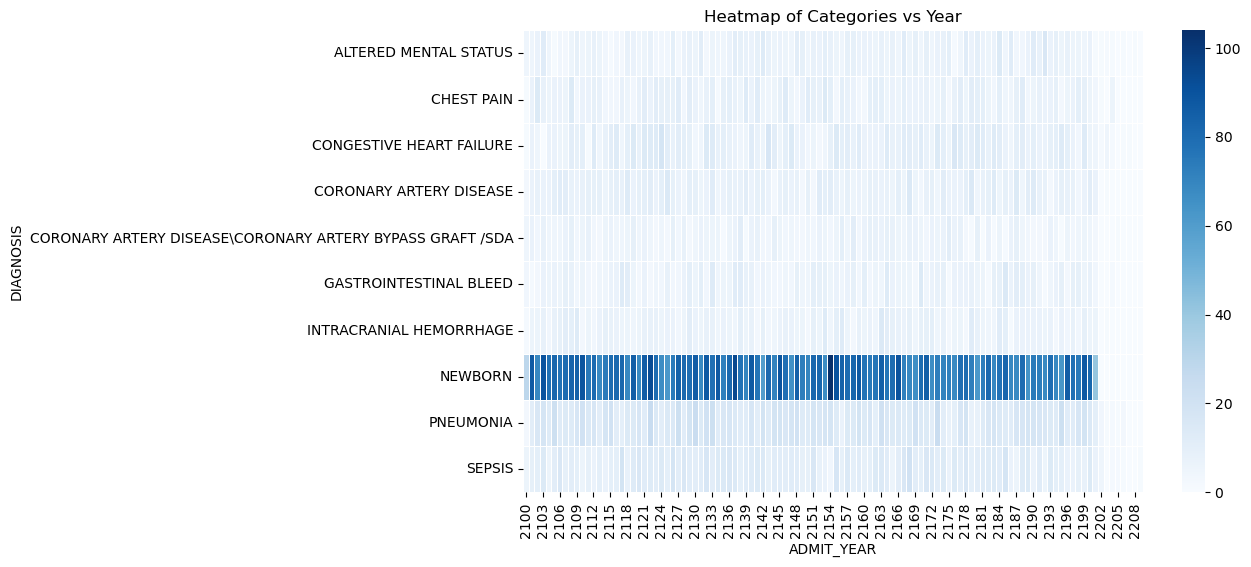

In [6]:
def toYear(date):
    dt = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return dt.year

df = admissions[['SUBJECT_ID', 'ADMITTIME', 'DIAGNOSIS']]
df['ADMIT_YEAR'] = df.apply(lambda row: toYear(row['ADMITTIME']), axis=1)
top10 = df['DIAGNOSIS'].value_counts().nlargest(10)
df_clean = df[df['DIAGNOSIS'].isin(top10.index)]

heatmap_data = df_clean.groupby(['DIAGNOSIS', 'ADMIT_YEAR']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Blues', fmt='d', linewidths=0.5)

# Add titles and labels
plt.title('Heatmap of Categories vs Year')
plt.xlabel('ADMIT_YEAR')
plt.ylabel('DIAGNOSIS')
#plt.xticks(rotation=70)
# Display the heatmap
plt.show()
#plt.tight_layout()

C:\Users\tom\AppData\Local\Temp\ipykernel_41736\875956533.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescriptions = pd.read_csv('PRESCRIPTIONS.csv')
C:\Users\tom\AppData\Local\Temp\ipykernel_41736\875956533.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df.apply(lambda row: calculate_age(row["DOB"], row["DOD"]), axis=1)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'SW'),
  Text(1, 0, 'Potassium Chloride'),
  Text(2, 0, 'D5W'),
  Text(3, 0, 'NS'),
  Text(4, 0, 'Magnesium Sulfate'),
  Text(5, 0, 'Insulin'),
  Text(6, 0, 'Iso-Osmotic Dextrose'),
  Text(7, 0, 'Metoprolol'),
  Text(8, 0, 'Morphine Sulfate'),
  Text(9, 0, 'Furosemide'),
  Text(10, 0, 'Sodium Chloride 0.9%  Flush'),
  Text(11, 0, 'Acetaminophen'),
  Text(12, 0, '0.9% Sodium Chloride'),
  Text(13, 0, 'Metoprolol Tartrate'),
  Text(14, 0, '5% Dextrose')])

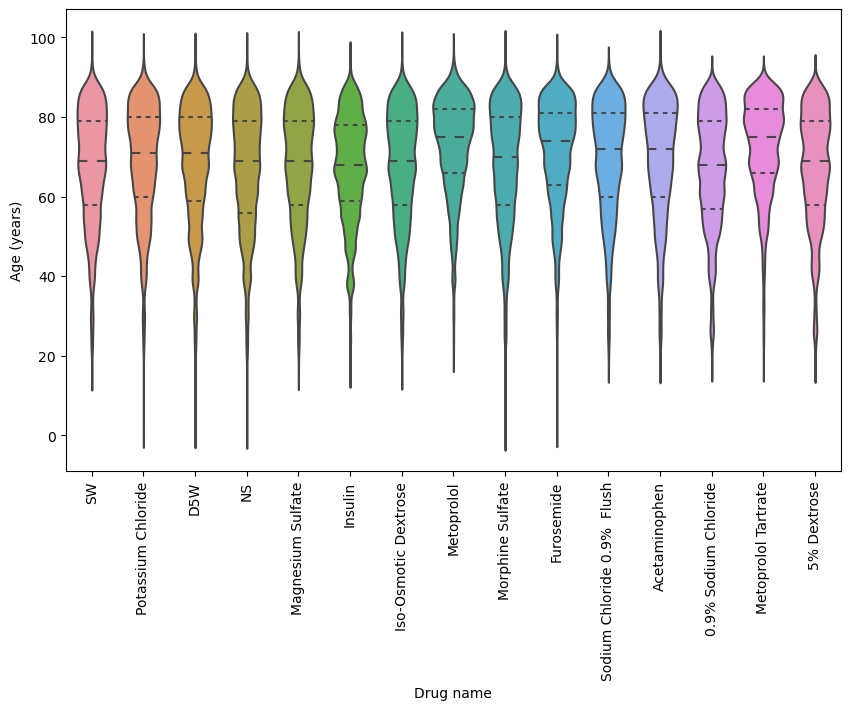

In [7]:
prescriptions = pd.read_csv('PRESCRIPTIONS.csv')
patients = pd.read_csv('PATIENTS.csv') 

df = patients[patients['EXPIRE_FLAG']==1]
# Calculate age function
def calculate_age(dob, dod):
    #print(dod)
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Apply calculate_age function to create "age" column
df["age"] = df.apply(lambda row: calculate_age(row["DOB"], row["DOD"]), axis=1)

# Filter out rows with age greater than or equal to 120
filtered_df = df[df["age"] < 120]

top10 = prescriptions['DRUG'].value_counts().nlargest(15)
prescriptions_clean = prescriptions[prescriptions['DRUG'].isin(top10.index)]


merged_prescriptions = pd.merge(prescriptions_clean, filtered_df, on='SUBJECT_ID', how='inner')

plt.figure(figsize=(10, 6))

sns.violinplot(x='DRUG', y='age', data=merged_prescriptions, inner='quartile')
plt.ylabel('Age (years)')  
plt.xlabel('Drug name')  
plt.xticks(rotation=90)

C:\Users\tom\AppData\Local\Temp\ipykernel_41736\2254288152.py:1: DtypeWarning: Columns (4,5,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  cpt_events = pd.read_csv('CPTEVENTS.csv')


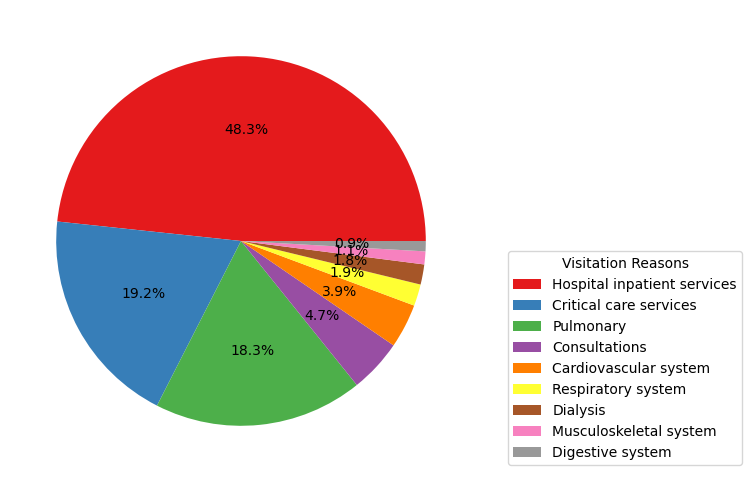

In [43]:
cpt_events = pd.read_csv('CPTEVENTS.csv')

cpt_categories = cpt_events['SUBSECTIONHEADER'].value_counts()
cpt_categories = cpt_categories[cpt_categories > 4000]
plt.figure(figsize=(10,6))

wedges, labels,_ = plt.pie(cpt_categories,autopct='%1.1f%%',colors=sns.color_palette("Set1", len(cpt_categories)))
plt.legend(wedges, cpt_categories.index, title="Visitation Reasons",loc="lower right", bbox_to_anchor=(1.1, 0, 0.5, 1))
plt.show()

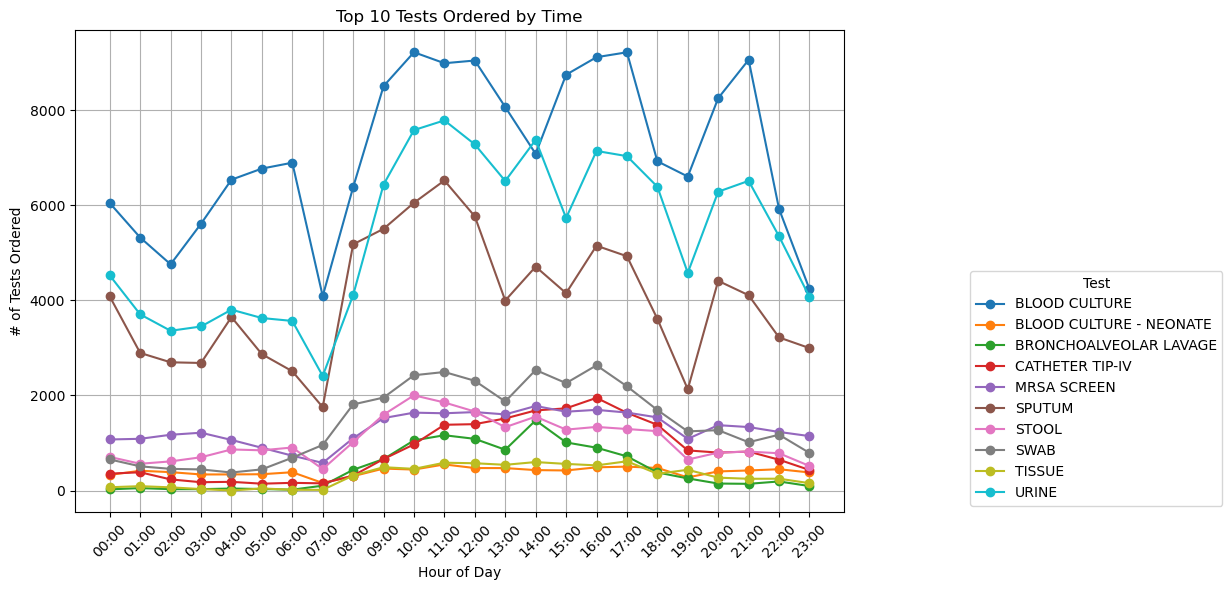

In [56]:
microbio = pd.read_csv('MICROBIOLOGYEVENTS.csv')
microbio_clean = microbio[['SPEC_TYPE_DESC', 'CHARTTIME']]
microbio_clean = microbio_clean.dropna(subset=['CHARTTIME'])
top_ct = microbio_clean['SPEC_TYPE_DESC'].value_counts().nlargest(10).index
microbio_clean = microbio_clean[microbio_clean['SPEC_TYPE_DESC'].isin(top_ct)]


def getHour(date):
    dt = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return dt.hour

microbio_clean['HOUR'] = microbio_clean.apply(lambda row: getHour(row['CHARTTIME']), axis=1)
hours = microbio_clean.groupby(['HOUR', 'SPEC_TYPE_DESC']).size().reset_index(name='count')

plt.figure(figsize=(14, 6))
for test in hours['SPEC_TYPE_DESC'].unique():
    subset = hours[hours['SPEC_TYPE_DESC'] == test]
    plt.plot(subset['HOUR'], subset['count'], marker='o', label=test)

plt.title('Top 10 Tests Ordered by Time')
plt.xlabel('Hour of Day')
plt.ylabel('# of Tests Ordered')
plt.xticks(range(24), [f'{i:02}:00' for i in range(24)], rotation=45)
plt.legend(title='Test',loc="lower right", bbox_to_anchor=(1.0, 0, 0.5, 1))
plt.tight_layout()
plt.grid()
plt.show()